In [1]:
import pandas as pd
import numpy as np

In [120]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_data

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
388901      ZWE    Africa     Zimbabwe  2024-03-20     266359.0        0.0   
388902      ZWE    Africa     Zimbabwe  2024-03-21     266359.0        0.0   
388903      ZWE    Africa     Zimbabwe  2024-03-22     266359.0        0.0   
388904      ZWE    Africa     Zimbabwe  2024-03-23     266359.0        0.0   
388905      ZWE    Africa     Zimbabwe  2024-03-24     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
388901                 0.0        5740.0         0.0                  0.0   
388902                 0.0        5740.0         0.0                  0.0   
388903                 0.0        5740.0         0.0                  0.0   
388904                 0.0        5740.0         0.0                  0.0   
388905                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
388901  ...          30.7                  36.791                         1.7   
388902  ...          30.7                  36.791                         1.7   
388903  ...          30.7                  36.791                         1.7   
388904  ...          30.7                  36.791                         1.7   
388905  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
388901            61.49                    0.571  16320539.0   
388902            61.49                    0.571  16320539.0   
388903            61.49                    0.571  16320539.0   
388904            61.49                    0.571  16320539.0   
388905            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

1) # Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [121]:
# Verifica delle dimensioni del dataset
print("Dimensioni del dataset:", covid_data.shape)

Dimensioni del dataset: (388906, 67)


Il dataset covid_data è composto da 388.906 righe e 67 colonne

In [8]:
# Visualizzazione dei metadati: informazioni sulle colonne e i tipi di dati
print("Informazioni sul dataset e metadati:")
covid_data.info()

Informazioni sul dataset e metadati:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388906 entries, 0 to 388905
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388906 non-null  object 
 1   continent                                   370322 non-null  object 
 2   location                                    388906 non-null  object 
 3   date                                        388906 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed              

2) # Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [9]:
# Dataset filtrato con colonna 'continent' senza i valori nulli
covid_data_filtrato = covid_data.dropna(subset=['continent'])
covid_data_filtrato

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
388901      ZWE    Africa     Zimbabwe  2024-03-20     266359.0        0.0   
388902      ZWE    Africa     Zimbabwe  2024-03-21     266359.0        0.0   
388903      ZWE    Africa     Zimbabwe  2024-03-22     266359.0        0.0   
388904      ZWE    Africa     Zimbabwe  2024-03-23     266359.0        0.0   
388905      ZWE    Africa     Zimbabwe  2024-03-24     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
388901                 0.0        5740.0         0.0                  0.0   
388902                 0.0        5740.0         0.0                  0.0   
388903                 0.0        5740.0         0.0                  0.0   
388904                 0.0        5740.0         0.0                  0.0   
388905                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
388901  ...          30.7                  36.791                         1.7   
388902  ...          30.7                  36.791                         1.7   
388903  ...          30.7                  36.791                         1.7   
388904  ...          30.7                  36.791                         1.7   
388905  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
388901            61.49                    0.571  16320539.0   
388902            61.49                    0.571  16320539.0   
388903            61.49                    0.571  16320539.0   
388904            61.49                    0.571  16320539.0   
388905            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [10]:
#Casi totali per continente
dati_covid_raggruppati_per_continente = covid_data_filtrato.groupby('continent')
covid_data_casi_totali_per_continente = dati_covid_raggruppati_per_continente['total_cases'].sum()
print(covid_data_casi_totali_per_continente)

continent
Africa           1.286876e+10
Asia             2.120759e+11
Europe           2.031561e+11
North America    1.105343e+11
Oceania          9.609695e+09
South America    6.432520e+10
Name: total_cases, dtype: float64


In [24]:
# I valori sono troppo alti, per cui si tratta probabilmente di dati aggregati, quindi filtro per location e data
covid_data_filtrato = covid_data_filtrato.sort_values(by=['location', 'date'])

# Calcolo l'ultimo dato disponibile per ogni paese
ultimo_dato_per_paese = covid_data_filtrato.groupby('location').last().reset_index()

totali_per_continente = ultimo_dato_per_paese.groupby('continent')['total_cases'].sum()

print(totali_per_continente)

continent
Africa            13139988.0
Asia             301386370.0
Europe           252417184.0
North America    124530802.0
Oceania           14814237.0
South America     68718444.0
Name: total_cases, dtype: float64


3) # Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [69]:
def confronta_continenti(data, continente1, continente2):
    # Calcolo del totale dei casi nel mondo, considerando l'ultimo valore disponibile per ogni paese
    ultimi_dati_mondo = data.drop_duplicates(subset='location', keep='last')
    covid_totali_mondo = ultimi_dati_mondo['total_cases'].sum()

    # Ciclo iterativo per analizzare i casi nei continenti specificati
    for continente in [continente1, continente2]:
        # Dati per il continente specifico
        dati_continente = data[data['continent'] == continente]
        ultimi_dati_continente = dati_continente.drop_duplicates(subset='location', keep='last')

        # Calcolo del valore massimo
        massimo = ultimi_dati_continente['total_cases'].max()

        # Calcolo della media
        media = ultimi_dati_continente['total_cases'].mean()

        # Calcolo della percentuale dei casi totali rispetto al mondo
        percentuale = (ultimi_dati_continente['total_cases'].sum() / covid_totali_mondo) * 100

       
        print("Numero totale dei casi nel mondo:", covid_totali_mondo)
        print(f"Statistiche per {continente}:")
        print(f"Valore massimo dei casi totali: {massimo}")
        print(f"Media dei casi totali: {media:.2f}")
        print(f"Percentuale dei casi totali rispetto al mondo: {percentuale:.2f}%")

    
confronta_continenti(covid_data, 'Europe', 'Asia')

Numero totale dei casi nel mondo: 609394643.0
Statistiche per Europe:
Valore massimo dei casi totali: 38997490.0
Media dei casi totali: 4665584.02
Percentuale dei casi totali rispetto al mondo: 32.92%
Numero totale dei casi nel mondo: 609394643.0
Statistiche per Asia:
Valore massimo dei casi totali: 99345680.0
Media dei casi totali: 5249352.80
Percentuale dei casi totali rispetto al mondo: 35.32%


# Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

<Axes: title={'center': 'Numero di nuovi casi in Italia nel 2022'}, xlabel='Data', ylabel='Nuovi casi'>

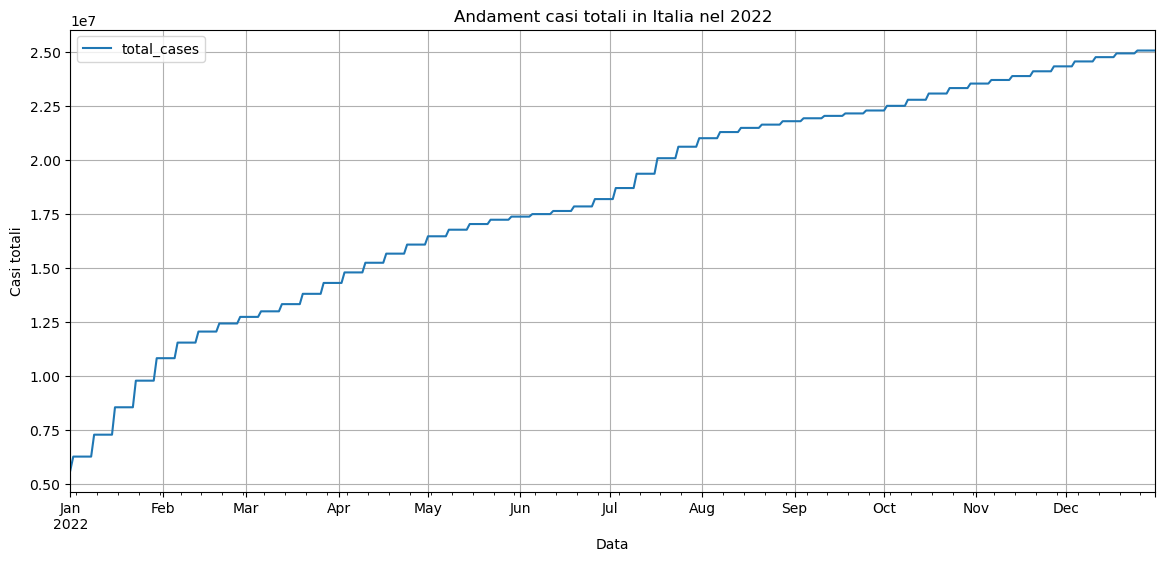

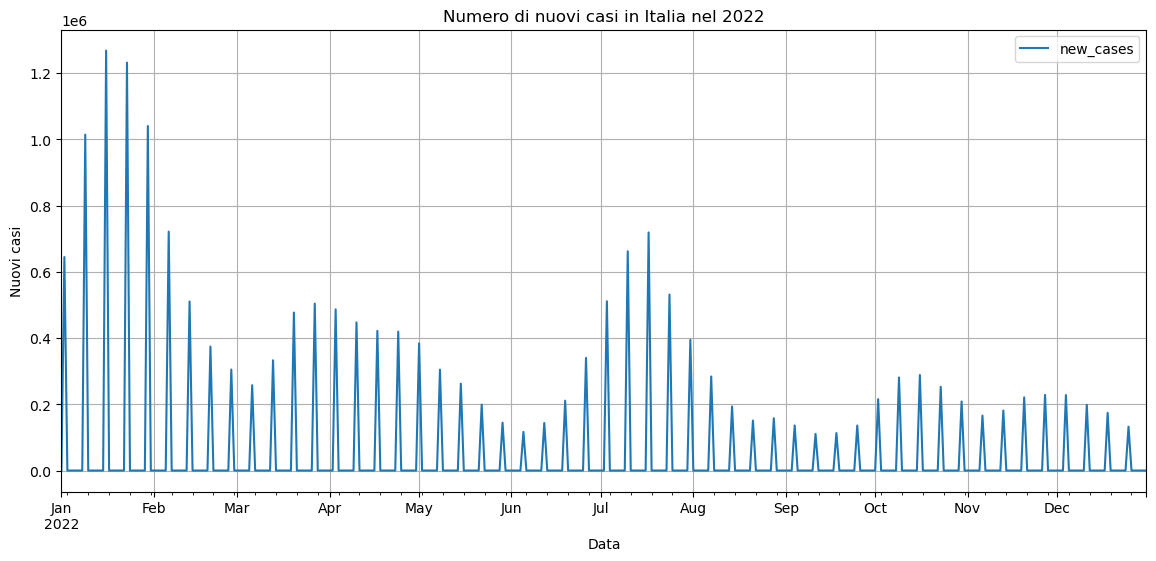

In [91]:
covid_data_filtrato['date'] = pd.to_datetime(covid_data_filtrato['date'])

# Filtro dati Italia 2022
dati_italia_2022 = covid_data_filtrato[(covid_data_filtrato['location'] == 'Italy') & (covid_data_filtrato['date'].dt.year == 2022)]

# Grafico casi totali Italia
dati_italia_2022.plot(x='date', y='total_cases', figsize=(14, 6), title='Andament casi totali in Italia nel 2022', xlabel='Data', ylabel='Casi totali', grid=True)

# Grafico nuovi casi italia
dati_italia_2022.plot(x='date', y='new_cases', figsize=(14, 6), title='Numero di nuovi casi in Italia nel 2022', xlabel='Data', ylabel='Nuovi casi', grid=True)

C:\Users\andreo.a\AppData\Local\Temp\ipykernel_43768\1380137018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['cumulative_new_cases'] = dati_italia_2022['new_cases'].cumsum()


<Axes: title={'center': 'Andamento della somma cumulativa dei nuovi casi in Italia nel 2022'}, xlabel='Data', ylabel='Somma cumulativa nuovi casi'>

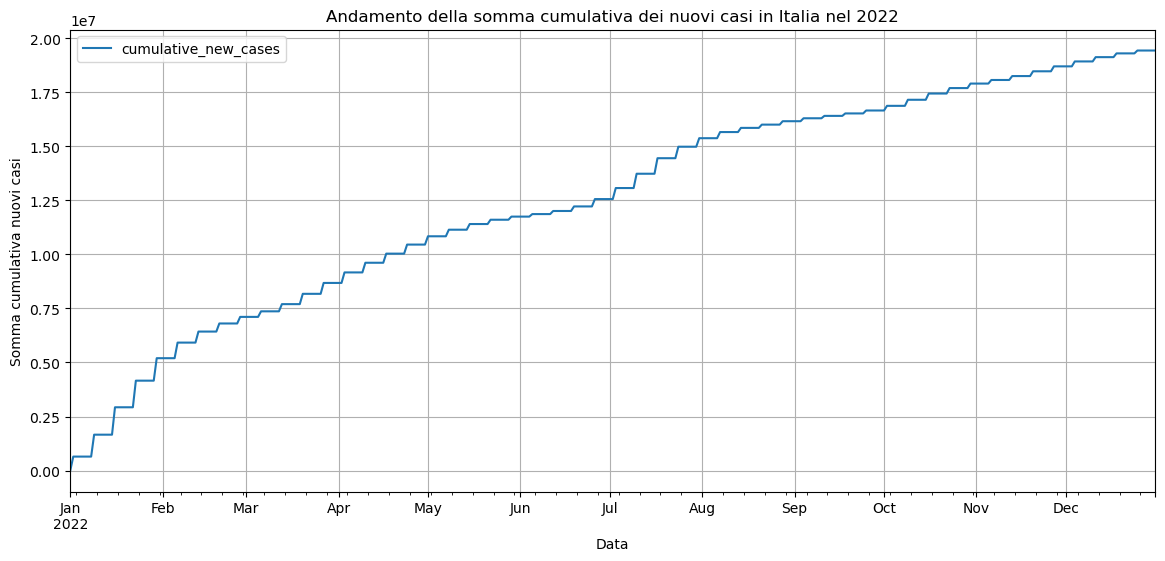

In [92]:
# Somma cumulativa dei nuovi casi
dati_italia_2022['cumulative_new_cases'] = dati_italia_2022['new_cases'].cumsum()

# Grafico somma cumulativa dei nuovi casi
dati_italia_2022.plot(x='date', y='cumulative_new_cases', figsize=(14, 6), title='Andamento della somma cumulativa dei nuovi casi in Italia nel 2022', xlabel='Data', ylabel='Somma cumulativa nuovi casi', grid=True
                      )

L'andamento dei casi totali di COVID-19 in Italia e la somma cumulativa dei nuovi casi nel 2022 mostrano entrambi una curva ascendente continua.

# Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

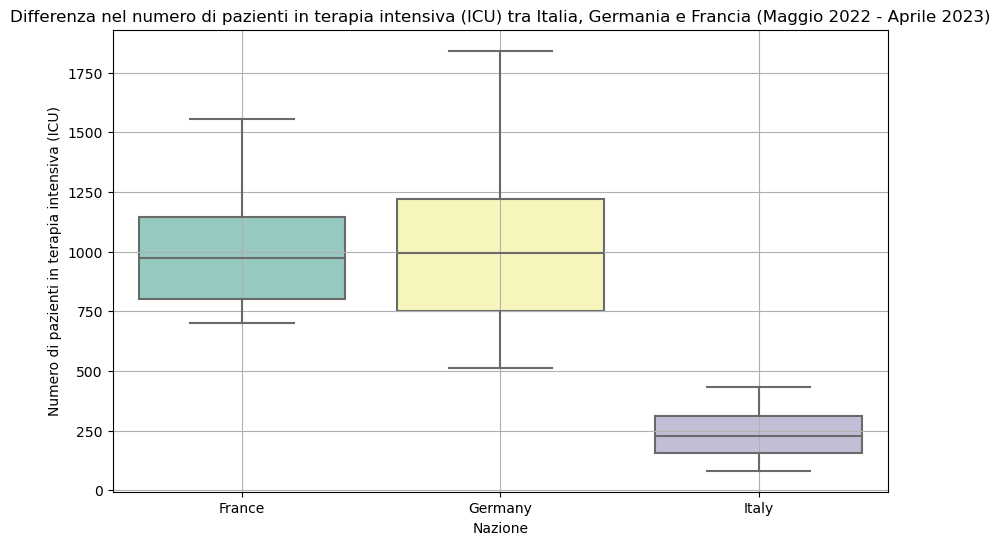

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

dati_icu = covid_data_filtrato[(covid_data_filtrato['location'].isin(['Italy', 'Germany', 'France'])) & 
                                (covid_data_filtrato['date'] >= '2022-05-01') & 
                                (covid_data_filtrato['date'] <= '2023-04-30')]

# Boxplot differenza nel numero di pazienti in terapia intensiva (ICU) tra le nazioni
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=dati_icu, x='location', y='icu_patients', palette='Set3')
plt.title('Differenza nel numero di pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.grid(True)
plt.show()


Il grafico mostra come l'Italia, da maggio 2022 ad aprile 2023, abbia gestito una situazione meno grave in termini di pazienti in terapia intensiva rispetto a Francia e Germania, anche guardando le variazioni dei valori minimi e massimi.

# Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.naio)
nnaio)


In [118]:
dati_2023 = covid_data[covid_data['date'].dt.year == 2023]
# Dati Italia, Germania, Francia e Spagna
dati_2023_nazioni = dati_2023[dati_2023['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]
# somma pazienti ospedalizzati per nazione
somma_ospedalizzati_per_nazione = dati_2023_nazioni.groupby('location')['hosp_patients'].sum()
print("Somma pazienti ospedalizzati 2023 per nazione:")
print(somma_ospedalizzati_per_nazione)


Somma pazienti ospedalizzati 2023 per nazione:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In presenza di dati nulli sui pazienti ospedalizzati, in questo caso potremmo sostituirli con zero, presupponendo che l'assenza di dati corrisponda a giorni senza ricoveri. 